# Data Cleansing

Source    : https://www.dqlab.id/

Typed by  : Aulia Khalqillah

Objective : Data Cleansing

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## Load Data

In [2]:
uncleaned_raw = pd.read_csv('uncleaned_raw.csv')
uncleaned_raw

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 08.26,29000,17850,Surabaya
1,536366,WHITE METAL LANTERN,6.0,12/01/10 08.26,41000,17850,Surabaya
2,536367,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 08.26,18000,17850,Surabaya
3,536368,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 08.26,38000,17850,Jakarta
4,536369,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 08.26,27000,17850,Medan
...,...,...,...,...,...,...,...
500,536772,PACK OF 60 SPACEBOY CAKE CASES,24.0,12/01/10 11.29,41000,16218,Surabaya
501,536773,PACK OF 72 RETROSPOT CAKE CASES,24.0,12/01/10 11.29,35000,16218,Surabaya
502,536774,72 SWEETHEART FAIRY CAKE CASES,24.0,12/01/10 11.29,32000,16218,Medan
503,536775,PACK OF 60 DINOSAUR CAKE CASES,24.0,12/01/10 11.29,31000,16218,Surabaya


In [3]:
uncleaned_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    505 non-null    int64  
 1   Description  505 non-null    object 
 2   Quantity     485 non-null    float64
 3   InvoiceDate  505 non-null    object 
 4   UnitPrice    505 non-null    int64  
 5   CustomerID   505 non-null    int64  
 6   City         505 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [4]:
uncleaned_raw['CustomerID'] = uncleaned_raw['CustomerID'].astype('str')
uncleaned_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    505 non-null    int64  
 1   Description  505 non-null    object 
 2   Quantity     485 non-null    float64
 3   InvoiceDate  505 non-null    object 
 4   UnitPrice    505 non-null    int64  
 5   CustomerID   505 non-null    object 
 6   City         505 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 27.7+ KB


## Check shape of data

In [5]:
uncleaned_raw.shape

(505, 7)

There are 505 rows and 7 columns.

## Check number of customers

In [6]:
uncleaned_raw['CustomerID'].nunique()

31

There are 31 customers in this data.

## Check missing value

using .any() to get True or False

In [7]:
uncleaned_raw.isnull().any()

InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool

using .sum() to get a number of missing value for each feature

In [8]:
uncleaned_raw.isnull().sum()

InvoiceNo       0
Description     0
Quantity       20
InvoiceDate     0
UnitPrice       0
CustomerID      0
City            0
dtype: int64

using .sum().sum() to get total of missing value

In [9]:
uncleaned_raw.isnull().sum().sum()

20

There are 20 missing values on Quantity feature

## Check Outliers

Check using outliers by using .boxplot()

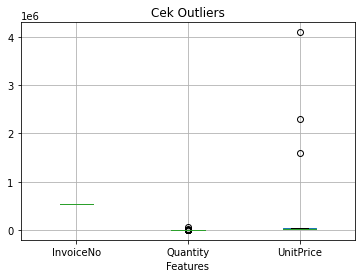

In [10]:
uncleaned_raw.boxplot()
plt.title('Cek Outliers')
plt.xlabel('Features')
plt.show()

There are outliers on UnitPrice and Quantity features. Remove these outliers by using Interquartile Range (IQR).

** UnitPrice**

In [11]:
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
# remove outliers
cleaned_raw = uncleaned_raw[
    ~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5 * IQR))).any(axis='columns')
    ]

**Quantity**

In [12]:
Q1 = cleaned_raw['Quantity'].quantile(0.25)
Q3 = cleaned_raw['Quantity'].quantile(0.75)
IQR = Q3 - Q1
# remove outliers
cleaned_raw = cleaned_raw[
    ~((cleaned_raw[['Quantity']] < (Q1 - 1.5 * IQR)) | (cleaned_raw[['Quantity']] > (Q3 + 1.5 * IQR))).any(axis='columns')
    ]

Check shape of data after remove outliers

In [13]:
cleaned_raw.shape

(445, 7)

There are 445 rows data and 7 columns after outilers was removed.

In [14]:
cleaned_raw = cleaned_raw.dropna(axis='rows')
cleaned_raw.isnull().sum()

InvoiceNo      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
City           0
dtype: int64

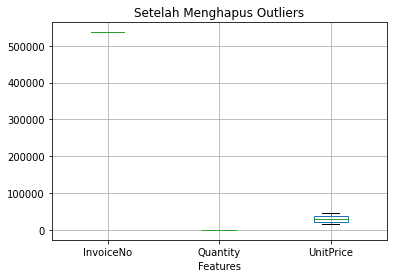

In [15]:
cleaned_raw.boxplot()
plt.title('Setelah Menghapus Outliers')
plt.xlabel('Features')
plt.show()

In [16]:
cleaned_raw['CustomerID'].nunique()

24

as we can see based on boxplot, there is no outliers anymore in this data and the 25 customers are selected after removing outliers.

## Features Exploration

Calculate the total price item based on its unit price and its quantity

In [17]:
cleaned_raw['Quantity'] = cleaned_raw['Quantity']
cleaned_raw['Total'] = cleaned_raw['UnitPrice']*cleaned_raw['Quantity']
cleaned_raw

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City,Total
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 08.26,29000,17850,Surabaya,174000.0
1,536366,WHITE METAL LANTERN,6.0,12/01/10 08.26,41000,17850,Surabaya,246000.0
2,536367,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 08.26,18000,17850,Surabaya,144000.0
3,536368,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 08.26,38000,17850,Jakarta,228000.0
4,536369,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 08.26,27000,17850,Medan,162000.0
...,...,...,...,...,...,...,...,...
500,536772,PACK OF 60 SPACEBOY CAKE CASES,24.0,12/01/10 11.29,41000,16218,Surabaya,984000.0
501,536773,PACK OF 72 RETROSPOT CAKE CASES,24.0,12/01/10 11.29,35000,16218,Surabaya,840000.0
502,536774,72 SWEETHEART FAIRY CAKE CASES,24.0,12/01/10 11.29,32000,16218,Medan,768000.0
503,536775,PACK OF 60 DINOSAUR CAKE CASES,24.0,12/01/10 11.29,31000,16218,Surabaya,744000.0


The column of Total have been added to this data.

## Check Duplicate Data

In [18]:
cleaned_raw[cleaned_raw.duplicated()]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City,Total
499,536771,PACK OF 72 SKULL CAKE CASES,24.0,12/01/10 11.29,25000,16218,Jakarta,600000.0
500,536772,PACK OF 60 SPACEBOY CAKE CASES,24.0,12/01/10 11.29,41000,16218,Surabaya,984000.0
501,536773,PACK OF 72 RETROSPOT CAKE CASES,24.0,12/01/10 11.29,35000,16218,Surabaya,840000.0
502,536774,72 SWEETHEART FAIRY CAKE CASES,24.0,12/01/10 11.29,32000,16218,Medan,768000.0
503,536775,PACK OF 60 DINOSAUR CAKE CASES,24.0,12/01/10 11.29,31000,16218,Surabaya,744000.0
504,536776,LUNCH BAG SUKI DESIGN,10.0,12/01/10 11.29,39000,16218,Jakarta,390000.0


There are 6 data are duplicate and we have to remove these duplicate data.

In [19]:
cleaned_raw = cleaned_raw.drop_duplicates()

Recheck the duplicate data

In [20]:
cleaned_raw.duplicated().any()

False

There is no duplicate data anymore.

## Calculate the total of quantity and unit price for each Customer ID

In [21]:
groupby_customerid= cleaned_raw.groupby(['CustomerID']).agg({
   'InvoiceNo': 'nunique',
   'Description': 'nunique',
   'Quantity': sum,
   'UnitPrice': sum,
   'City': 'nunique'
}).reset_index()

groupby_customerid

,CustomerID,InvoiceNo,Description,Quantity,UnitPrice,City
0,12431,14,14,107.0,467000,3
1,12583,18,18,365.0,517000,3
2,12791,1,1,1.0,33000,1
3,13047,16,16,69.0,489000,3
4,13408,2,2,32.0,64000,2
5,13448,18,18,162.0,516000,3
6,13705,9,9,79.0,264000,3
7,13767,11,11,132.0,266000,3
8,14307,40,40,410.0,1242000,3
9,14527,1,1,1.0,32000,1


## Categorize customers by their city transaction place

In [22]:
city_list = cleaned_raw['City'].unique().tolist()
city_list

['Surabaya', 'Jakarta', 'Medan']

There are only three cities which are customers transaction taking place, Surabaya, Jakarta and Medan.

### One City

One different customer who transaction in each city

In [23]:
costumerid_one_city = groupby_customerid[groupby_customerid['City'] == 1].reset_index().drop('index',axis=1)['CustomerID']
costumerid_one_city.unique()

array(['12791', '14527', '17809', '17924'], dtype=object)

In [24]:
cid_one_city = cleaned_raw[cleaned_raw['CustomerID'].isin(costumerid_one_city.unique())]
cid_one_city

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City,Total
105,536470,JAM MAKING SET PRINTED,24.0,12/01/10 09.41,27000,17809,Jakarta,648000.0
141,536506,Discount,1.0,12/01/10 09.41,32000,14527,Surabaya,32000.0
296,536661,SET OF 3 BLACK FLYING DUCKS,12.0,12/01/10 10.51,17000,17924,Medan,204000.0
386,536751,POSTAGE,1.0,12/01/10 11.27,33000,12791,Jakarta,33000.0


### Two City

A same customers who transaction in two cities

In [25]:
costumerid_two_city = groupby_customerid[groupby_customerid['City'] == 2].reset_index().drop('index',axis=1)['CustomerID']
costumerid_two_city.unique()

array(['13408', '16098'], dtype=object)

In [26]:
cid_two_city = cleaned_raw[cleaned_raw['CustomerID'].isin(costumerid_two_city.unique())]
cid_two_city

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City,Total
142,536507,INFLATABLE POLITICAL GLOBE,12.0,12/01/10 09.45,35000,16098,Medan,420000.0
143,536508,VINTAGE SNAKES & LADDERS,8.0,12/01/10 09.45,21000,16098,Surabaya,168000.0
144,536509,CHOCOLATE CALCULATOR,12.0,12/01/10 09.45,27000,16098,Surabaya,324000.0
145,536510,JUMBO SHOPPER VINTAGE RED PAISLEY,10.0,12/01/10 09.45,42000,16098,Surabaya,420000.0
146,536511,RECYCLING BAG RETROSPOT,10.0,12/01/10 09.45,27000,16098,Surabaya,270000.0
148,536513,ANTIQUE GLASS DRESSING TABLE POT,8.0,12/01/10 09.45,24000,16098,Surabaya,192000.0
149,536514,ALARM CLOCK BAKELIKE GREEN,4.0,12/01/10 09.45,31000,16098,Medan,124000.0
150,536515,IVORY GIANT GARDEN THERMOMETER,12.0,12/01/10 09.45,19000,16098,Surabaya,228000.0
151,536516,3 TIER CAKE TIN GREEN AND CREAM,2.0,12/01/10 09.45,44000,16098,Surabaya,88000.0
152,536517,3 TIER CAKE TIN RED AND CREAM,2.0,12/01/10 09.45,31000,16098,Surabaya,62000.0


### Three City

A same customers who transaction in three cities

In [27]:
costumerid_all_city = groupby_customerid[groupby_customerid['City'] == 3].reset_index().drop('index',axis=1)['CustomerID']
costumerid_all_city.unique()

array(['12431', '12583', '13047', '13448', '13705', '13767', '14307',
       '14688', '15311', '15862', '16218', '16250', '17420', '17511',
       '17548', '17850', '17908', '18074'], dtype=object)

In [28]:
cid_all_city = cleaned_raw[cleaned_raw['CustomerID'].isin(costumerid_all_city.unique())]
cid_all_city

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City,Total
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 08.26,29000,17850,Surabaya,174000.0
1,536366,WHITE METAL LANTERN,6.0,12/01/10 08.26,41000,17850,Surabaya,246000.0
2,536367,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 08.26,18000,17850,Surabaya,144000.0
3,536368,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 08.26,38000,17850,Jakarta,228000.0
4,536369,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 08.26,27000,17850,Medan,162000.0
...,...,...,...,...,...,...,...,...
494,536859,UNION JACK FLAG LUGGAGE TAG,1.0,12/01/10 11.45,33000,17908,Medan,33000.0
495,536860,RED HEART LUGGAGE TAG,1.0,12/01/10 11.45,30000,17908,Medan,30000.0
496,536861,RED GLASS TASSLE BAG CHARM,1.0,12/01/10 11.45,32000,17908,Jakarta,32000.0
497,536862,CLEAR ACRYLIC FACETED BANGLE,1.0,12/01/10 11.45,39000,17908,Jakarta,39000.0


### Merge Data of City Categories

In [29]:
n_cid_city = pd.DataFrame(
    [
        cid_one_city['CustomerID'].nunique(), 
        cid_two_city['CustomerID'].nunique(), 
        cid_all_city['CustomerID'].nunique()
    ],
    index=[
        str('/'.join(cid_one_city['City'].unique().tolist())),
        str(' & '.join(cid_two_city['City'].unique())),
        str(' & '.join(cid_all_city['City'].unique())),
    ],
    columns=[
        'Number_of_Customers'
    ]
)
n_cid_city

,Number_of_Customers
Jakarta/Surabaya/Medan,4
Medan & Surabaya,2
Surabaya & Jakarta & Medan,18


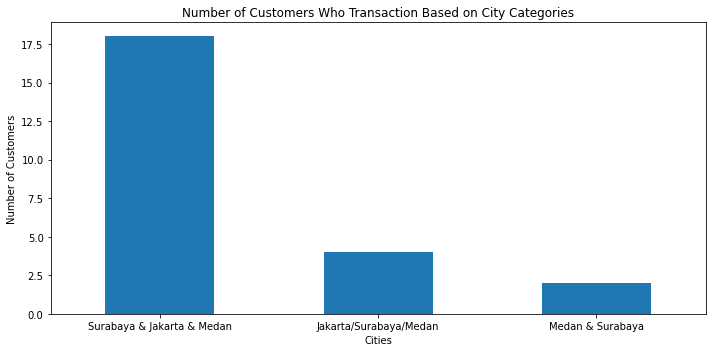

In [30]:
n_cid_city.sort_values(by='Number_of_Customers', ascending=False).plot(kind='bar', legend=None, figsize=(10,5))
plt.xticks(rotation=0)
plt.xlabel('Cities')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Who Transaction Based on City Categories')
plt.tight_layout()
plt.show()

We have 24 customers who transaction in all retails. The retails are spread out in three different cities, Jakarta, Surabaya and Medan. Specifically, there are 18 customers who transaction in all cities, 2 customers who transaction only in Medan and Surabaya, and only one different customer who transaction in each city respectively.

## Identify Total of Quantity For Each Product

In [31]:
items = cleaned_raw.groupby('Description').agg({'Quantity':sum}).reset_index()
items = items.rename(columns={'Description':'Product'})
items

,Product,Quantity
0,10 COLOUR SPACEBOY PEN,24.0
1,12 PENCILS TALL TUBE SKULLS,12.0
2,3 PIECE SPACEBOY COOKIE CUTTER SET,18.0
3,3 STRIPEY MICE FELTCRAFT,6.0
4,3 TIER CAKE TIN GREEN AND CREAM,2.0
...,...,...
284,WRAP COWBOYS,25.0
285,YELLOW BREAKFAST CUP AND SAUCER,1.0
286,YELLOW COAT RACK PARIS FASHION,3.0
287,YOU'RE CONFUSING ME METAL SIGN,3.0


**The highest quantity product**

In [32]:
high_product = items[items['Quantity'] == items['Quantity'].max()]
high_product

,Product,Quantity
158,PACK OF 72 RETROSPOT CAKE CASES,72.0


**Which city sells this item?**

In [33]:
cleaned_raw[cleaned_raw['Description'].isin(high_product['Product'])]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City,Total
268,536633,PACK OF 72 RETROSPOT CAKE CASES,24.0,12/01/10 10.47,37000,13767,Surabaya,888000.0
408,536773,PACK OF 72 RETROSPOT CAKE CASES,24.0,12/01/10 11.29,35000,16218,Surabaya,840000.0
469,536834,PACK OF 72 RETROSPOT CAKE CASES,24.0,12/01/10 11.41,25000,14307,Medan,600000.0


From 289 items in all stores, the item of PACK OF 72 RETROSPOT CAKE CASES is the highest sold. This item is only in stores of Surabaya and Medan.

## Total Revenue

In [34]:
revenue_jkt = cleaned_raw[cleaned_raw['City'] == 'Jakarta']['Total'].sum()
revenue_medan = cleaned_raw[cleaned_raw['City'] == 'Medan']['Total'].sum()
revenue_sby = cleaned_raw[cleaned_raw['City'] == 'Surabaya']['Total'].sum()
revenue_total = cleaned_raw['Total'].sum()

total_revenue = pd.DataFrame({
   'Jakarta': [revenue_jkt],
   'Medan': [revenue_medan],
   'Surabaya': [revenue_sby]
}, index=['Total Revenue'])

total_revenue = total_revenue.T.sort_values('Total Revenue',ascending=False).reset_index().rename(columns={'index':'City'})
total_revenue

,City,Total Revenue
0,Surabaya,35941000.0
1,Medan,32779000.0
2,Jakarta,27466000.0


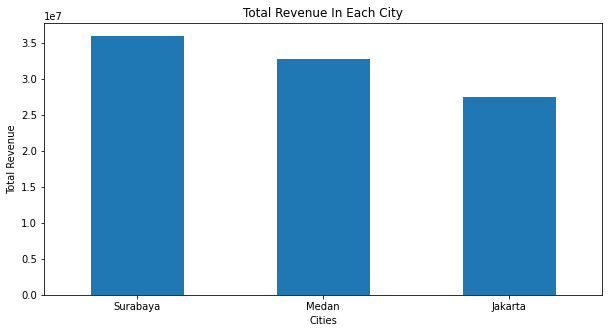

In [35]:
total_revenue.plot(x='City',y='Total Revenue', kind='bar', legend=None, figsize=(10,5))
plt.xticks(rotation=0)
plt.xlabel('Cities')
plt.ylabel('Total Revenue')
plt.title('Total Revenue In Each City')
plt.show()

The store in Surabaya has higher revenue around of 35.941.000.0 than other two cities. Unfortunately, store in Jakarta has lower revenue in this period.